In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time
import h5py
from pycbc.conversions import mchirp_from_mass1_mass2,primary_mass,secondary_mass
from pycbc.conversions import chi_eff
import pylab

In [2]:
threeogc = h5py.File('/work/yifan.wang/3ogcPE/datarelease/3-ogc.hdf','r')
fourogc = h5py.File('/work/ahnitz/WWW/4ogc/4-ogc.hdf')

In [3]:
np.size(threeogc['name'][:]),np.size(fourogc['name'][:])

(3739087, 6681661)

In [4]:
fourogc.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'name', 'obs', 'pastro', 'spin1z', 'spin2z', 'stat', 'time', 'trig']>

In [5]:
fourogc['stat'][:],fourogc['trig'][:]

(array([7.06073487, 7.3852373 , 7.0598919 , ..., 7.09787083, 7.39673927,
        7.07648918]),
 array([b'L', b'L', b'L', ..., b'H', b'H', b'H'], dtype='|S3'))

# Select those interesting triggers

In [6]:
# convert the GW events name to UTF-8 format
gwfile = fourogc
gwobs = np.array([obs.decode("utf-8") for obs in gwfile['trig'][:]])

#mass
max_mchirp = mchirp_from_mass1_mass2(2,2)
min_mchirp = mchirp_from_mass1_mass2(1,1)
mc = mchirp_from_mass1_mass2(gwfile['mass1'][:], gwfile['mass2'][:])
#lmass = (mc > min_mchirp) & (mc < max_mchirp)
mass1 = primary_mass(gwfile['mass1'][:],gwfile['mass2'][:])
mass2 = secondary_mass(gwfile['mass1'][:],gwfile['mass2'][:])
#lmass = (mass2>=1) & (mass2<=2) & (mass1<=2)
lmass = (mass2<=2)

#spin
spin = chi_eff(gwfile['mass1'][:], gwfile['mass2'][:],gwfile['spin1z'][:], gwfile['spin2z'][:])
lspin = (spin<0.2) & (spin>-0.2)

#at least two detectors
# This doesn't affect the results because single detector trigger doesn't have a IFAR
ltrig = (gwobs == 'HL') | (gwobs == 'HLV') | (gwobs == 'LV') | (gwobs == 'HV')
#ltrig = True

#false alarm rate < every 10 min
yr2min = 365.25*24*60
lifar = (gwfile['ifar'][:] > 1/yr2min * 10)

# time during O3a start and 2019 07, 02 00:00:00
ltime = (gwfile['time'][:] > Time('2019-04-01T00:00:00').gps) & (gwfile['time'][:] < Time('2019-07-02T00:00:00').gps)
l = lmass & lspin & ltrig & lifar & ltime
print('There are ', l.sum(), ' triggers')

# the index of a qualified GW event
gwidx = np.where(l)[0]

There are  3063  triggers


# FRB

In [7]:
#FRB file: CHIME FRB catalog 1
frb = pd.read_csv('/work/yifan.wang/em/gitrepo/chimefrbcat1.csv')
# convert the mjd_inf time to a datetime64 format
frb_t =  Time(frb['mjd_inf'][:],format='mjd').datetime64

tO3_start = Time('2019-04-01T00:00:00')
tO3_end = Time('2019-09-30T23:59:59')
frb = frb[(frb_t <tO3_end) & (frb_t > tO3_start) & (frb['repeater_name'] == '-9999')] #not a repeated FRB

In [8]:
frb_t

array(['2018-07-25T17:59:24.451592811', '2018-07-27T00:51:56.364304558',
       '2018-07-29T00:48:17.159175645', '2018-07-29T17:28:13.780430336',
       '2018-07-30T03:37:16.006944277', '2018-08-01T08:47:07.000151854',
       '2018-08-06T14:12:53.829371366', '2018-08-10T17:28:49.252425372',
       '2018-08-10T22:40:39.618344698', '2018-08-12T11:45:23.208825616',
       '2018-08-14T14:20:10.822712467', '2018-08-14T14:20:10.825633141',
       '2018-08-14T14:49:45.090940911', '2018-08-17T01:49:07.915989999',
       '2018-09-04T16:06:32.822496314', '2018-09-06T18:25:39.305545064',
       '2018-09-06T21:17:19.936233452', '2018-09-07T06:05:21.435769089',
       '2018-09-07T06:15:27.974966238', '2018-09-07T09:09:54.201484951',
       '2018-09-07T11:47:53.364068172', '2018-09-07T20:01:03.193017687',
       '2018-09-08T21:12:59.004631005', '2018-09-09T16:56:26.183904251',
       '2018-09-10T08:05:48.936566245', '2018-09-11T12:59:11.532739168',
       '2018-09-11T15:00:15.664683189', '2018-09-15

In [9]:
frb

tns_name previous_name repeater_name      ra  ra_err ra_notes    dec  \
406  FRB20190401A         -9999         -9999  196.80    0.19    -9999  79.91   
407  FRB20190402A         -9999         -9999  178.61    0.23    -9999  47.10   
408  FRB20190403G         -9999         -9999   81.74    0.22    -9999  25.78   
409  FRB20190403A         -9999         -9999  116.33    0.24    -9999  86.36   
410  FRB20190403B         -9999         -9999  135.47    0.18    -9999   1.46   
..            ...           ...           ...     ...     ...      ...    ...   
595  FRB20190701A         -9999         -9999  277.47    0.21    -9999  59.04   
596  FRB20190701B         -9999         -9999  302.93    0.22    -9999  80.18   
597  FRB20190701C         -9999         -9999   96.36    0.23    -9999  81.63   
598  FRB20190701D         -9999         -9999  112.10    0.18    -9999  66.70   
599  FRB20190701E         -9999         -9999  138.57    0.19    -9999  61.71   

     dec_err dec_notes      gl  ...  sp_idx_err  sp_run  sp_run_err high_freq  \
406    0.210     -9999  122.07  ...        0.85    -4.1         1.3     800.2   
407    0.220     -9999  148.44  ...        2.60   -16.7         6.3     657.4   
408    0.250     -9999  180.44  ...        6.30   -76.0        13.0     603.2   
409    0.290     -9999  126.94  ...        1.60    -8.9         2.5     800.2   
410    0.090     -9999  227.76  ...        1.10   -11.1         1.9     714.3   
..       ...       ...     ...  ...         ...     ...         ...       ...   
595    0.220     -9999   88.29  ...        1.50     3.3         1.9     800.2   
596    0.240     -9999  112.88  ...        1.70   -11.8         3.1     732.8   
597    0.270     -9999  132.18  ...        9.00  -211.0        41.0     495.5   
598    0.160     -9999  149.28  ...        0.75   -20.9         1.6     651.8   
599    0.036     -9999  153.27  ...        1.40    -5.1         2.2     800.2   

     low_freq  peak_freq      chi_sq     dof  flag_frac  excluded_flag  
406     400.2      479.1  531748.797  529866      0.433              0  
407     400.2      453.3  586927.640  582762      0.376              0  
408     425.5      506.6  448191.356  446874      0.282              0  
409     400.2      513.6  362788.787  360538      0.421              0  
410     400.2      453.2  881211.496  878553      0.436              0  
..        ...        ...         ...     ...        ...            ...  
595     400.2      800.2  341779.300  341690      0.451              0  
596     400.2      471.5  329229.311  330137      0.470              0  
597     402.2      446.4  285697.192  286362      0.540              0  
598     400.2      467.6  358566.724  354457      0.431              0  
599     400.2      410.3  359241.191  356889      0.427              0  

[160 rows x 55 columns]

### There are 160 FRB events satisfying our selection

### RA,DEC distribution

In [12]:
ra_frb = np.array(frb['ra'])/ 180 * np.pi
dec_frb = np.array(frb['dec']) / 180 * np.pi

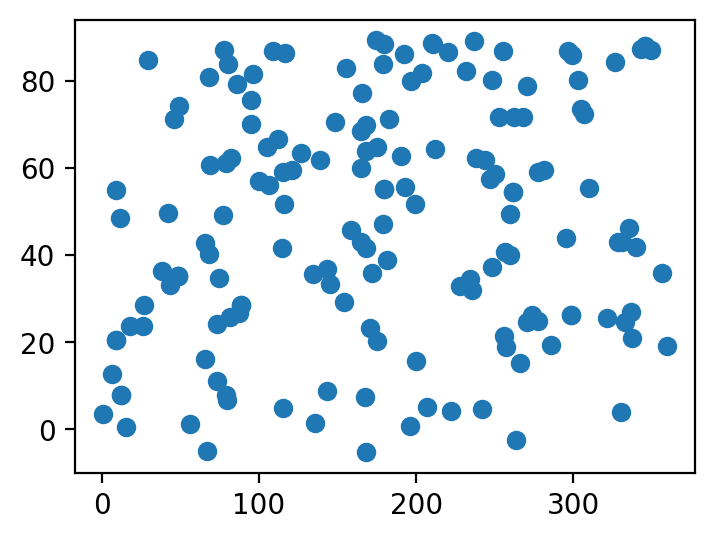

In [13]:
pylab.figure(figsize=[4,3],dpi=200)
pylab.scatter(frb['ra'],frb['dec'])

In [14]:
t_gw = gwfile['time'][gwidx]

#add a new column called 'gpstime'
frb['gpstime'] = Time(frb['mjd_inf'][:],format='mjd').gps
t_frb = np.array(frb['gpstime'])

#name_frb = np.array(frb['tns_name'])

#name_gw = gwfile['name'][gwidx]
#mass1_gw = gwfile['mass1'][gwidx]
#mass2_gw = gwfile['mass2'][gwidx]
#spin1z_gw = gwfile['spin1z'][gwidx]
#spin2z_gw = gwfile['spin2z'][gwidx]
#ifar_gw = gwfile['ifar'][gwidx]

# sort the order
sort1 = t_frb.argsort()
sort2 = t_gw.argsort()
t_frb = t_frb[sort1]
t_gw = t_gw[sort2]

# Time window [-600,3600]

In [15]:
#[t_frb ---10s--- t_gw ----------- 3600s ------------- t_gw]
left = np.searchsorted(t_frb, t_gw - 600)
right = np.searchsorted(t_frb, t_gw + 3600)

#t_frb > t_gw-10 while t_frb > t_gw+3600
gw_co_idx = np.where((right - left) > 0)[0]
frb_co_idx = left[gw_co_idx]
print('There are ', len(gw_co_idx), 'coincidence.')

There are  227 coincidence.


# Verification

(array([22., 20., 20., 21., 24., 27., 22., 26., 19., 26.]),
 array([-595.69010997, -179.4476193 ,  236.79487138,  653.03736205,
        1069.27985272, 1485.5223434 , 1901.76483407, 2318.00732474,
        2734.24981542, 3150.49230609, 3566.73479676]),
 <BarContainer object of 10 artists>)

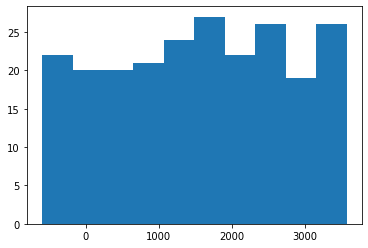

In [16]:
pylab.hist(t_frb[frb_co_idx] - t_gw[gw_co_idx])

# Print the triggers. Two sets: with ra, dec and without ra,dec

In [ ]:
noskydir = '/work/yifan.wang/em/prod1/nosky/triggers/'

io3a = 0

for ii in gwfound:
    print('#########################')
    print('Trigger from GRB/GW search: ',name_gw[ii])

    with open(noskydir + 'o3a_trigger_'+str(io3a)+'_nosky.ini', 'w') as t:
        t.write('[trigger]\nmass1=%f\nmass2=%f\nspin1z=%f\nspin2z=%f\ntrigger_time=%f' %   
                (mass1_gw[ii],mass2_gw[ii],
                 spin1z_gw[ii],spin2z_gw[ii],
                 t_gw[ii]))
        t.close()
        io3a  +=1

In [ ]:
noskydir = '/work/yifan.wang/em/prod1/nosky/triggers/'
eventdir = '/work/yifan.wang/em/prod1/nosky/events_nosky.ini'
o3a = 0
with open(eventdir, 'w') as t:
    
    for ii in gwfound:
        print('#########################')
        print('Trigger from GRB/GW search: ',name_gw[ii])
        t.write('[event-o3a_'+str(name_gw[ii].decode())+']\nlabel='+str(name_gw[ii].decode())+'\nconfig-files=nosky_inference.ini\n\t\to3a.ini\n\t\ttriggers/o3a_trigger_'+str(o3a)+'_nosky.ini\n\n')
        o3a = o3a+1
t.close()

# Make sky triggers

In [ ]:
skydir = '/work/yifan.wang/em/prod1/sky/triggers/'

io3a = 0

for ii,vv in enumerate(gwfound):
    print('#########################')
    print('Trigger from GRB/GW search: ',name_gw[vv])

    with open(skydir + 'o3a_trigger_'+str(io3a)+'_sky.ini', 'w') as t:
        t.write('[trigger]\nmass1=%f\nmass2=%f\nspin1z=%f\nspin2z=%f\nra=%f\ndec=%f\ntrigger_time=%f' %   
                (mass1_gw[vv],mass2_gw[vv],
                 spin1z_gw[vv],spin2z_gw[vv],
                 ra_frb[frbfound][ii],dec_frb[frbfound][ii],
                 t_gw[vv]))
        t.close()
        io3a  +=1

In [ ]:
eventdir = '/work/yifan.wang/em/prod1/sky/events_sky.ini'
o3a = 0
with open(eventdir, 'w') as t:
    
    for ii in gwfound:
        print('#########################')
        print('Trigger from GRB/GW search: ',name_gw[ii])
        t.write('[event-o3a_'+str(name_gw[ii].decode())+']\nlabel='+str(name_gw[ii].decode())+'\nconfig-files=sky_inference.ini\n\t\to3a.ini\n\t\ttriggers/o3a_trigger_'+str(o3a)+'_sky.ini\n\n')
        o3a = o3a+1
t.close()

In [ ]:
ifrb = []
for n in [b'190519_223219',
b'190623_113752',
b'190617_021148',
b'190518_082303',
b'190419_223729']:
    l = np.where(name_gw[gwfound][:]==n)
    print(l)
    ifrb.append(l[0][0])

In [ ]:
ifrb

In [ ]:
for i in ifrb:
    print(name_frb[frbfound][i])

In [ ]:
len(t_frb[frbfound])

In [ ]:
ifar_gw[gwfound]

In [ ]:
data = np.array(np.column_stack((name_gw[gwfound], ifar_gw[gwfound])),dtype=[('S16',float)])

In [ ]:
data

In [ ]:
import h5py
f = h5py.File('/work/yifan.wang/em/prod1/gw_triggers.hdf', 'w')
f.create_dataset('gwname', data=name_gw[gwfound])
f.create_dataset('gwifar', data=ifar_gw[gwfound])
f.create_dataset('frbname',data=name_frb[frbfound])
f.close()